# 📊 Analyzing Data with Pandas and Visualizing Results with Matplotlib
This notebook demonstrates how to load, clean, analyze, and visualize the Iris dataset using Pandas, Matplotlib, and Seaborn.

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Enable inline plotting for Jupyter
%matplotlib inline

# Set seaborn style for better visuals
sns.set(style='whitegrid')

## 🔍 Task 1: Load and Explore the Dataset

In [15]:
# Load Iris dataset
iris = load_iris()

# Convert to pandas DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Display the first few rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
# Step 1: Import pandas
df.to_csv('iris.csv', index=False)
print("CSV file 'iris.csv' has been created.")
# Step 2: Show the first 5 rows of the dataset
df.head()


CSV file 'iris.csv' has been created.


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:


# Load iris.csv from the same folder
df = pd.read_csv('iris.csv')

# Show the first 5 rows
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
# Check data types and missing values
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species               object
dtype: object

Missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [19]:
# Demonstration of handling missing values (introducing a NaN manually)
df.iloc[0, 0] = np.nan
print("Missing values after inserting one:")
print(df.isnull().sum())

# Fill the missing value with mean
df['sepal length (cm)'] = df['sepal length (cm)'].fillna(df['sepal length (cm)'].mean())
print("\nMissing values after filling:")
print(df.isnull().sum())

Missing values after inserting one:
sepal length (cm)    1
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Missing values after filling:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


## 📈 Task 2: Basic Data Analysis

In [20]:
# Summary statistics of numerical columns
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.848322,3.057333,3.758000,1.199333
std,0.825809,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [21]:
# Group by species and calculate mean
grouped = df.groupby('species').mean()
grouped

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.020966,3.428,1.462,0.246
versicolor,5.936000,2.770,4.260,1.326
virginica,6.588000,2.974,5.552,2.026


### ✨ Observations:
- Virginica species has the highest average petal dimensions.
- Setosa has the smallest petal lengths and widths.
- Sepal and petal lengths help in separating species.

## 📊 Task 3: Data Visualization

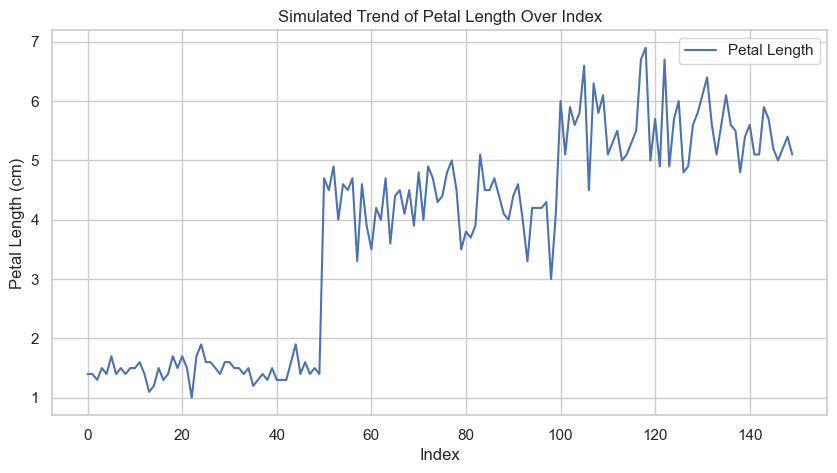

In [22]:
# Line chart – simulated trend
plt.figure(figsize=(10, 5))
plt.plot(df['petal length (cm)'], label='Petal Length')
plt.title('Simulated Trend of Petal Length Over Index')
plt.xlabel('Index')
plt.ylabel('Petal Length (cm)')
plt.legend()
plt.show()

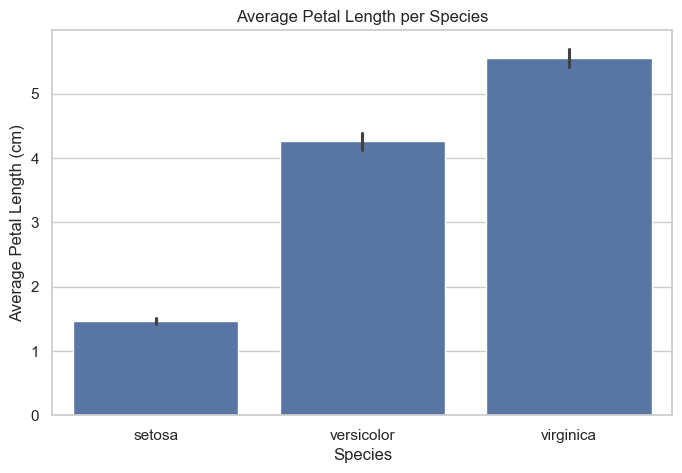

In [23]:
# Bar chart – average petal length by species
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='species', y='petal length (cm)', estimator=np.mean)
plt.title('Average Petal Length per Species')
plt.ylabel('Average Petal Length (cm)')
plt.xlabel('Species')
plt.show()

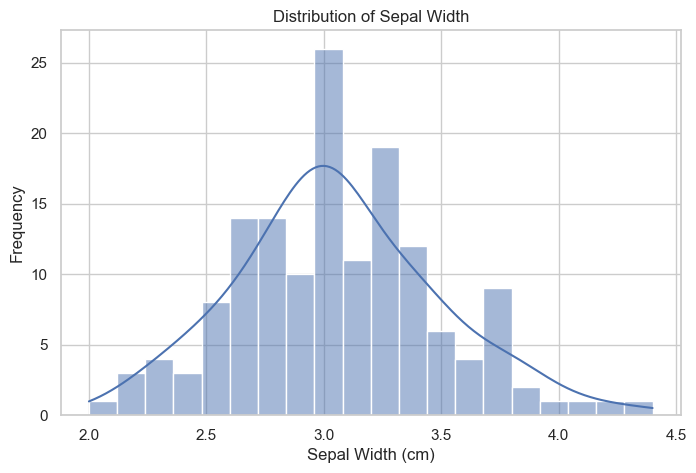

In [24]:
# Histogram – distribution of sepal width
plt.figure(figsize=(8, 5))
sns.histplot(df['sepal width (cm)'], bins=20, kde=True)
plt.title('Distribution of Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.show()

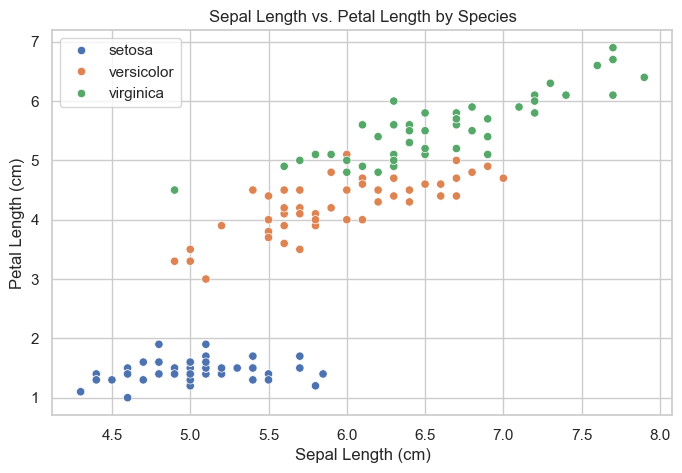

In [12]:
# Scatter plot – sepal length vs petal length
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue='species')
plt.title('Sepal Length vs. Petal Length by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend()
plt.show()

## 🧠 Findings and Conclusions:
- Iris Setosa shows smaller petal dimensions with tight clustering.
- Virginica shows highest values in most features.
- The species are visually distinguishable using petal measurements.

In [13]:
try:
    df_csv = pd.read_csv("iris.csv")
except FileNotFoundError:
    print("Error: File not found. Please ensure 'iris.csv' is in the directory.")
except pd.errors.ParserError:
    print("Error: CSV could not be parsed.")
except Exception as e:
    print(f"An error occurred: {e}")